# Martin Boerlin, Christian K. Machens, Sophie Deneve, "Predictive Coding of Dynamical Variables in Balanced Spiking Networks", PLOS computational biology

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
time = 500. # Simulation timecourse
dt = 1e-1; # Simulation dt

N = 400 # Number of neurons
J = 1 # Dimensionality of the dynamical system

# True Trajectory of J dimensional dynamical system, with c as command variables.

Gamma = np.random.randn(J,N); # Decoding or output weights

v = 1e-5 # Linear cost term: To control number of spikes
mu = 1e-6 # Quadratic cost term: To distribute spikes evenly between neurons   

lambda_d = 10 # Read out's decay rate

T_i = 0.5 * (v*lambda_d + mu*lambda_d**2 + sum(Gamma**2, 1)) # Threshold for neurons


lambda_v = 20 # leak term for membrane potential decay with time
eta = np.random.normal(0,1,niter) # Background noise with unit variance
sigma_v = 1e-3 # scale for the background noise
sigma_s = 0. # signal noise

# Dynamical system
A = np.eye(J) #State transition matrix for evolution of x. At this point, it is identity.
c = 100.*np.reshape(np.concatenate((np.zeros(int(0.2*niter)), np.ones(int(0.2*niter)), np.zeros(int(0.2*niter)), -np.ones(int(0.2*niter)), np.zeros(int(0.2*niter)))), (J, niter)) # Command variables
c += sigma_s

estimate_x = np.ones(shape=(J,niter)) # Input estimate made by weighted linear integration of spike trains


omega_f = np.dot(Gamma.T, Gamma) + mu*lambda_d**2*np.eye(Gamma.shape[1]) # Fast lateral connections
omega_s = np.dot(np.dot(Gamma.T, A + lambda_d*np.eye(A.shape[0])), Gamma) # Slow lateral connections

W = np.random.randint(0,1,size=(N,N)) # Weight matrix of connectivity

V = np.zeros(shape=(N,niter)) # Membrane voltage of neurons
o = np.zeros(shape=(N,niter)) # Output spike trains
r = np.zeros(shape=(N,niter)) # Time varying rate firing rate of neurons

In [15]:
## Figure 1. Spike based implementation of linear dynamical systems

In [16]:
for i in range(niter-1):
    # Evolving dynamical variables over time with command input
    x[:,i+1] = (np.dot((A+1),x[:,i]) + c[:,i])*dt

    # Membrane potential evolution
    V[:,i+1] = (-lambda_v*dt  + 1)* V[:,i] + np.sum(W,1)*o[:,i] + np.dot(Gamma.T*dt, c[:,i]) + sigma_v* eta[i] #+ o[i]
    
    # Spike train produced
    o[:,i+1] += np.array( V[:,i] > T_i, dtype=np.int) # If apike occurs, add to o

    # Rate evolution
    r[:,i+1] = (-lambda_d*dt  + 1)* r[:,i] + lambda_d*o[:,i]*dt
    
    # Evolution of the estimate of x above
    estimate_x[:,i+1] = (-lambda_d*dt  + 1)* estimate_x[:,i] + np.dot(Gamma,o[:,i])*dt
    
    # Spiking activity dependent weight changes
    W = omega_s *(-lambda_d*dt+1)*W - omega_f*np.array( V[:,i] > T_i, dtype=np.int)

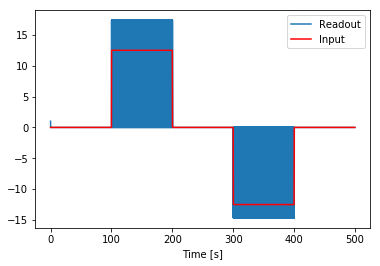

In [18]:
t = np.linspace(0,time, niter)
fig, ax = plt.subplots()
ax.plot(t, estimate_x[0, :], label="Readout")
ax.plot(t, x[0,:], label="Input", c='r')
plt.legend()
plt.xlabel("Time [s]")
plt.show()

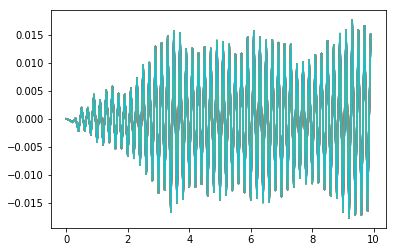

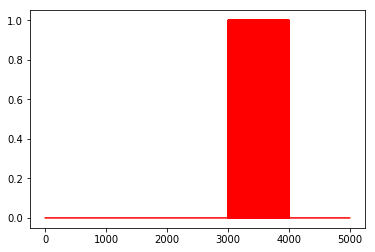

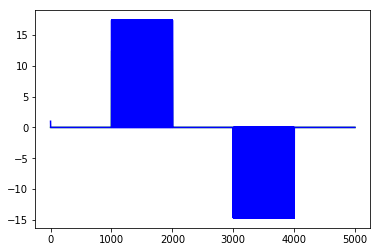

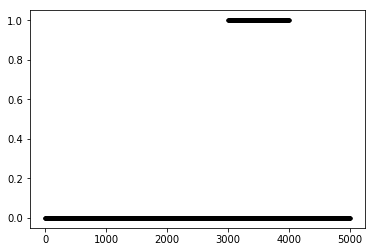

In [29]:
for j in range(20):
    plt.plot(t[:100], V[j,:100])
plt.show()

plt.plot(r[0,:], c='r')
plt.show()

plt.plot(x[0,:], c='g')
plt.plot(estimate_x[0,:], c='b')
plt.show()

plt.plot(o[101,:], '.', c='k')
plt.show()

In [30]:
## Oscillatory input

In [31]:
c = np.reshape([[100 * np.sin(np.linspace(0,2*np.pi,niter) + k*np.pi/4)] for k in range(J)], (J, niter)) # Command variables

In [32]:
# True Trajectory of J dimensional dynamical system, with c as command variables.
niter = int(time/dt)
x = np.zeros(shape=(J,niter))
#c = 100*np.random.normal(size=(J,niter))


#c = 100*np.zeros(niter)
estimate_x = np.ones(shape=(J,niter))

omega_f = np.dot(Gamma.T, Gamma) + mu*lambda_d**2*np.eye(Gamma.shape[1])
omega_s = np.dot(np.dot(Gamma.T, A + lambda_d*np.eye(A.shape[0])), Gamma)

W = np.random.randint(0,1,size=(N,N))
o = np.zeros(shape=(N,niter))
V = np.zeros(shape=(N,niter))

eta = np.random.normal(0,1,niter)
r = np.zeros(shape=(N,niter))
for i in range(niter-1):
    
        x[:,i+1] = (np.dot((A+1),x[:,i]) + c[:,i])*dt
        
        estimate_x[:,i+1] = (-lambda_d*dt  + 1)* estimate_x[:,i] + np.dot(Gamma,o[:,i])*dt
        
        V[:,i+1] = (-lambda_v*dt  + 1)* V[:,i] + np.sum(W,1)*o[:,i] + np.dot(Gamma.T*dt, c[:,i]) + sigma_v* eta[i] #+ o[i]
        
        o[:,i+1] += np.array( V[:,i] > T_i, dtype=np.int) # If apike occurs, add to o
        
        W = omega_s *(-lambda_d*dt+1)*W - omega_f*np.array( V[:,i] > T_i, dtype=np.int)
        
        r[:,i+1] = (-lambda_d*dt  + 1)* r[:,i] + lambda_d*o[:,i]*dt

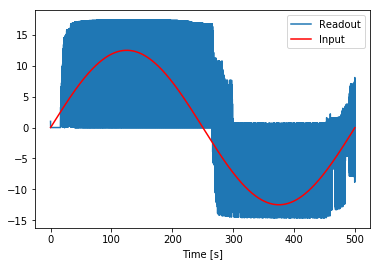

In [34]:
t = np.linspace(0,time, niter)
fig, ax = plt.subplots()
ax.plot(t, estimate_x[0, :], label="Readout")
ax.plot(t, x[0,:], label="Input", c='r')
plt.legend()
plt.xlabel("Time [s]")
plt.show()

In [239]:
time = 500.
N = 400 # Number of neurons
J = 2 # Dimensionality of the dynamical system

Gamma = 0.2*np.random.randn(J,N);
mu = 1e-6
lambda_d = 10
lambda_v = 20
sigma_v = 1e-3
v = 1e-5
T_i = 0.5 * (v*lambda_d + mu*lambda_d**2 + sum(Gamma**2, 1))

A = np.eye(J)
dt = 1e-1;

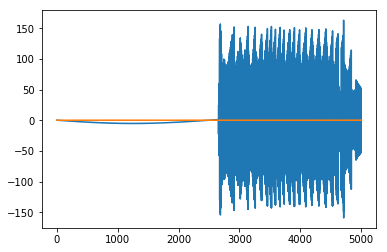

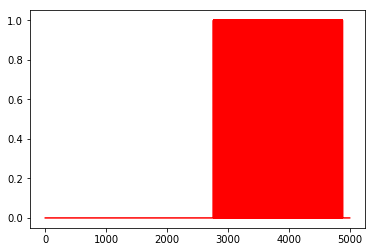

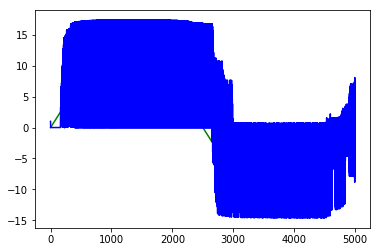

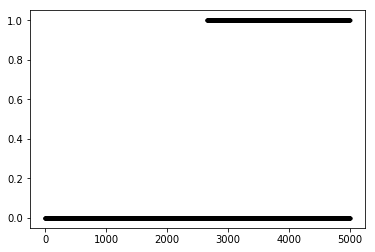

In [36]:
for jjj in [10,15]:
    plt.plot(V[jjj,:])
plt.show()

plt.plot(r[0,:], c='r')
plt.show()

plt.plot(x[0,:], c='g')
plt.plot(estimate_x[0,:], c='b')
plt.show()

plt.plot(o[101,:], '.', c='k')
plt.show()

In [39]:
## Visualizing the W matrix

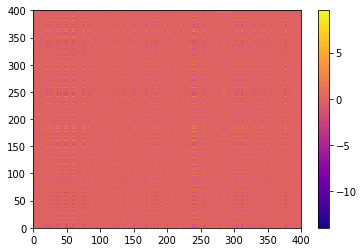

In [40]:
cbar = plt.pcolor(W, cmap='plasma')
plt.colorbar(cbar)
plt.show()